In [1]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import pylab as plt
import random
from scipy import stats
from sklearn.neighbors import KDTree
import time
from sklearn.metrics import mean_squared_error
from astropy.cosmology import FlatLambdaCDM
from os import listdir
import desispec
import desispec.io
import speclite.filters
import scipy
from desitarget.targetmask import desi_mask, bgs_mask, mws_mask
from desitarget.cmx.cmx_targetmask import cmx_mask

In [2]:
n=50*10**3
nw=7781

spectra_load=np.load("/global/homes/a/ashodkh/results/spectra.txt.npz")
spectra=spectra_load["arr_0"]
waves_load=np.load("/global/homes/a/ashodkh/results/redshifted_waves.txt.npz")
redshifted_waves=waves_load["arr_0"]
zs_load=np.load("/global/homes/a/ashodkh/results/zs.txt.npz")
zs=zs_load["arr_0"]


# spectra=np.zeros([n,nw])
# redshifted_waves=np.zeros([n,nw])

# with open("/global/homes/a/ashodkh/results/spectra.txt",'r') as f:
#     spectra_str=f.readlines()
# with open("/global/homes/a/ashodkh/results/redshifted_waves.txt",'r') as f:
#     redshifted_waves_str=f.readlines()
    
# for i in range(n):
#     spectra[i,:]=np.array(spectra_str[i].split(","),dtype=float)
#     redshifted_waves[i,:]=np.array(redshifted_waves_str[i].split(","),dtype=float)

(array([8.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 2.000e+00,
        3.000e+00, 0.000e+00, 1.000e+00, 1.000e+01, 1.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 4.000e+00,
        1.300e+01, 1.700e+01, 3.000e+01, 5.700e+01, 1.060e+02, 1.840e+02,
        3.310e+02, 6.080e+02, 1.024e+03, 1.225e+03, 1.229e+03, 1.697e+03,
        1.837e+03, 2.230e+03, 2.913e+03, 3.277e+03, 3.711e+03, 3.227e+03,
        3.038e+03, 3.414e+03, 3.429e+03, 2.602e+03, 2.927e+03, 2.105e+03,
        2.001e+03, 1.496e+03, 1.515e+03, 1.640e+03, 6.390e+02, 8.070e+02,
        4.670e+02, 1.670e+02]),
 array([3642.4450491 , 3766.07342914, 3889.70180918, 4013.33018922,
        4136.95856926, 4260.5869493 , 4384.21532934, 4507.84370939,
        4631.47208943, 4755.10046947, 4878.72884951, 5002.35722955,
        5125.98560959, 5249.61398963, 5373.24236967, 5496.87074971,
        5620.49912975, 5744.12750979, 5867.75588983, 5991.38426987,
        6115.01264991, 6238.64102995

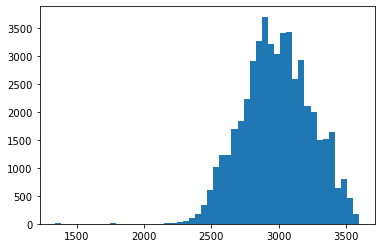

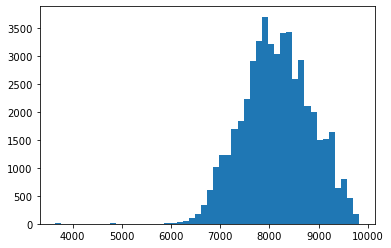

In [3]:
wave_min=np.amin(redshifted_waves,axis=1)
wave_max=np.amax(redshifted_waves,axis=1)

plt.figure(1)
plt.hist(wave_min,bins=50)
plt.figure(2)
plt.hist(wave_max,bins=50)

In [4]:
w1=3400
w2=7000

select1=wave_min<w1
select2=wave_max>w2
select=select1*select2
print(len(np.where(select1!=select2)[0]))

5144


In [5]:
wavelength=redshifted_waves[0,:]*(1+zs[0])
print(np.where(wavelength==w1))

(array([], dtype=int64),)


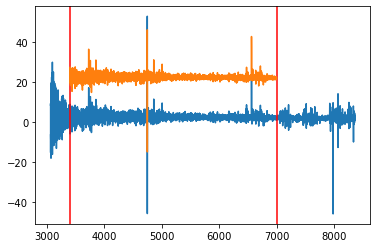

In [6]:
plt.figure(1)
plt.plot(redshifted_waves[0,:],spectra[0,:])
plt.axvline(x=w1,color='r')
plt.axvline(x=w2,color='r')

d=np.average(redshifted_waves[:,1]-redshifted_waves[:,0])
big_bin=np.arange(w1,w2,d)

spectrum_test=np.interp(big_bin,redshifted_waves[0,:],spectra[0,:])
plt.figure(1)
plt.plot(big_bin,spectrum_test+20)



In [7]:
n_s=len(np.where(select==True)[0])

spectra_s=spectra[select,:]
redshifted_waves_s=redshifted_waves[select,:]

In [8]:
spectra_bin=np.zeros([n_s,len(big_bin)])

for i in range(n_s):
    spectra_bin[i,:]=np.interp(big_bin,redshifted_waves_s[i,:],spectra_s[i,:])

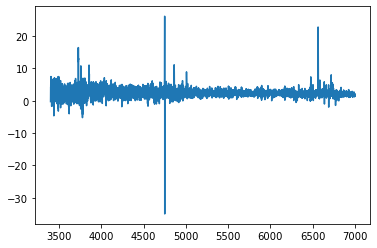

In [9]:
plt.plot(big_bin,spectra_bin[0,:])

In [10]:
np.savez_compressed("/global/homes/a/ashodkh/results/spectra_bin.txt",spectra_bin)
np.savez_compressed("/global/homes/a/ashodkh/results/big_bin.txt",big_bin)